In [1]:
# Libraries working for arrays and dataframe
import numpy as np
import pandas as pd
# Used for Data Visualization and statistical tool
from scipy import stats
from pydataset import data
import seaborn as sns
import matplotlib.pyplot as plt 

#personal files/functions
import wrangle as w

### Acquire and Prep

In [2]:
df=w.covid_data()

/Users/chellyannmoreno/codeup-data-science/covid19-project/wrangle.py:69: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['risk_sum'] = df[risk_columns].sum(axis=1)


In [3]:
train,validate,test=w.split_data(df,'risk_category')

In [4]:
train.shape, validate.shape,test.shape

((629145, 22), (209715, 22), (209715, 22))

In [86]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629145 entries, 899001 to 668391
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   med_level        629145 non-null  int64  
 1   gender           629145 non-null  int64  
 2   is_hospitalized  629145 non-null  int64  
 3   is_dead          629145 non-null  int64  
 4   ventilator       629145 non-null  float64
 5   pneumonia        629145 non-null  float64
 6   age              629145 non-null  float64
 7   pregnant         629145 non-null  float64
 8   diabetes         629145 non-null  float64
 9   copd             629145 non-null  float64
 10  asthma           629145 non-null  float64
 11  immunosup        629145 non-null  float64
 12  hypertension     629145 non-null  float64
 13  heart_problems   629145 non-null  float64
 14  obese            629145 non-null  float64
 15  renal_disease    629145 non-null  float64
 16  smoker           629145 non-null 

In [5]:
train.is_dead.value_counts()

0    582857
1     46288
Name: is_dead, dtype: int64

In [6]:
train.risk_category.value_counts()

Medium    302239
Low       263017
High       63889
Name: risk_category, dtype: int64

## Data Visualization

In [7]:
def create_pie_chart(df, column_name,title):
    values = df[column_name].value_counts()
    labels = values.index.tolist()
    sizes = values.tolist()
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.title(title)
    plt.show()

In [8]:
train_pos=train[train.covid_pos==1]

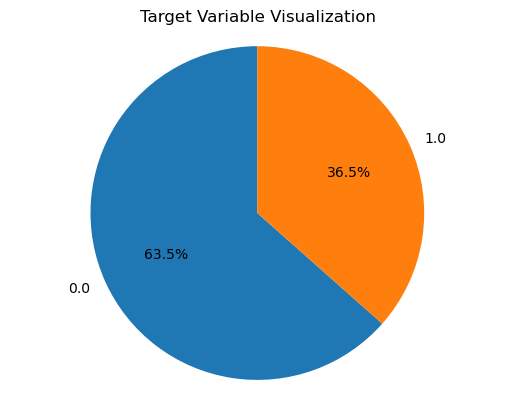

In [9]:
create_pie_chart(train,'covid_pos','Target Variable Visualization')

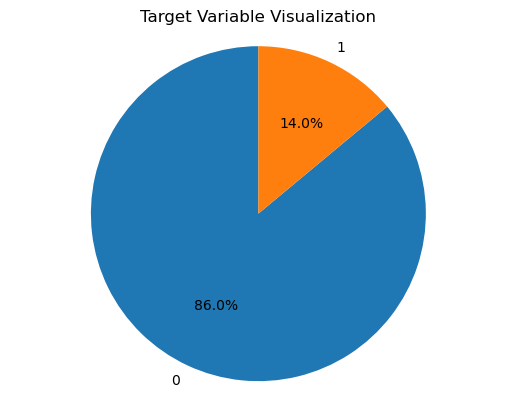

In [10]:
create_pie_chart(train_pos,'is_dead','Target Variable Visualization')

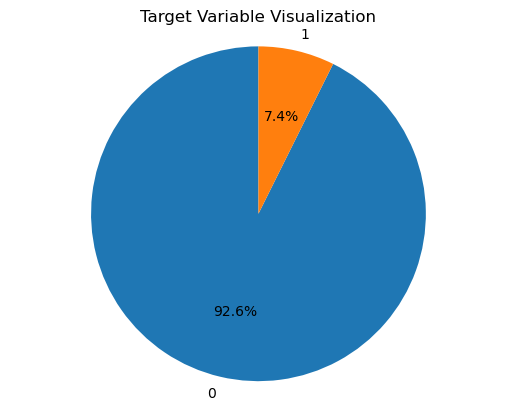

In [11]:
create_pie_chart(train,'is_dead','Target Variable Visualization')

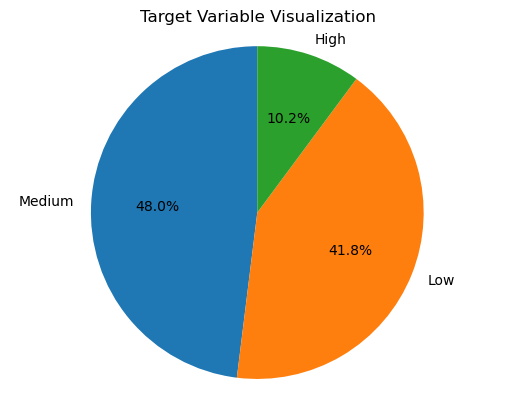

In [12]:
create_pie_chart(train,'risk_category','Target Variable Visualization')

med_level


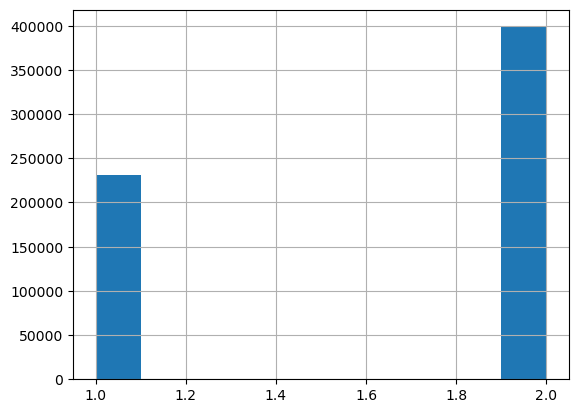

gender


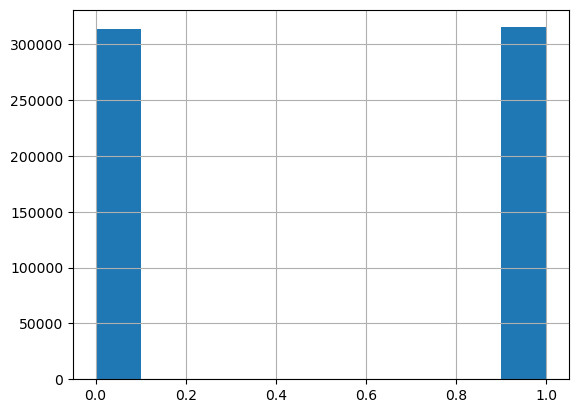

is_hospitalized


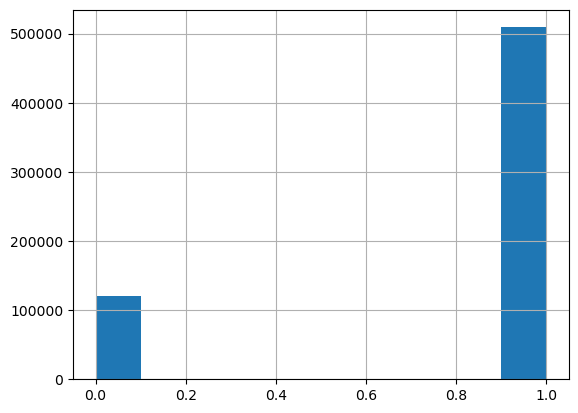

is_dead


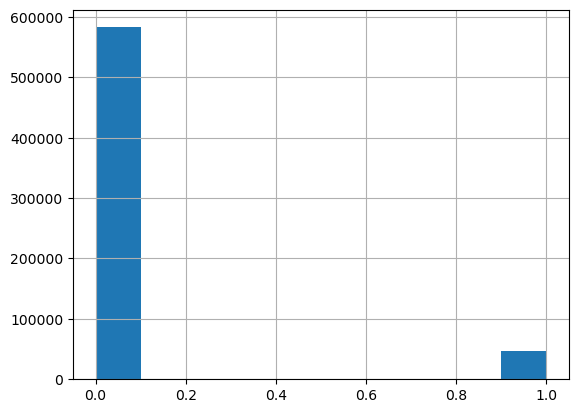

ventilator


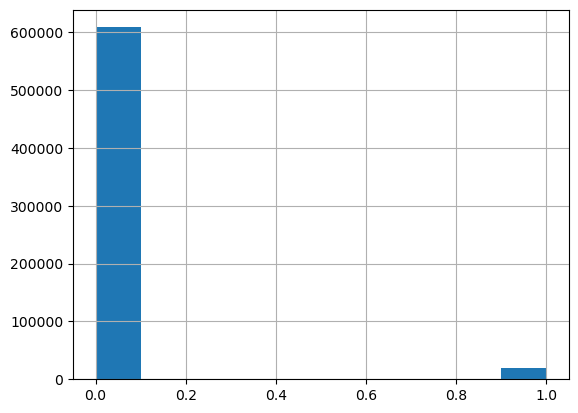

pneumonia


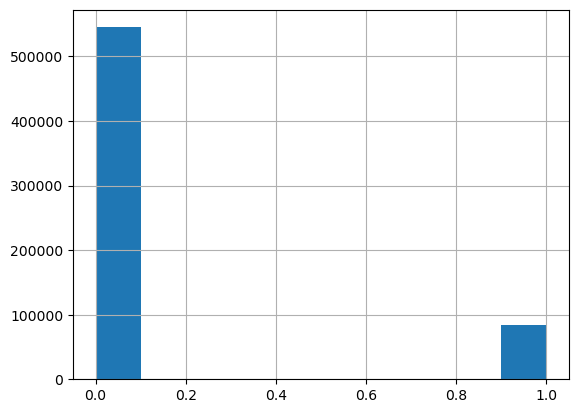

age


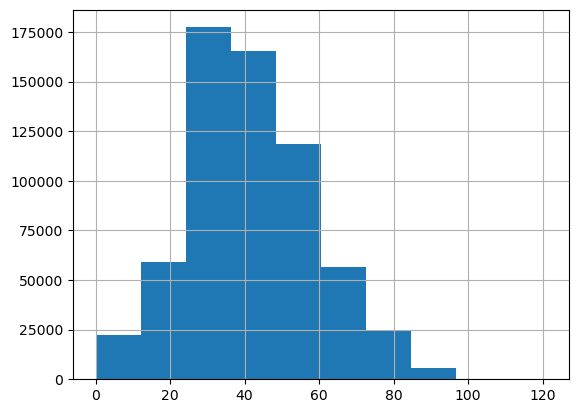

pregnant


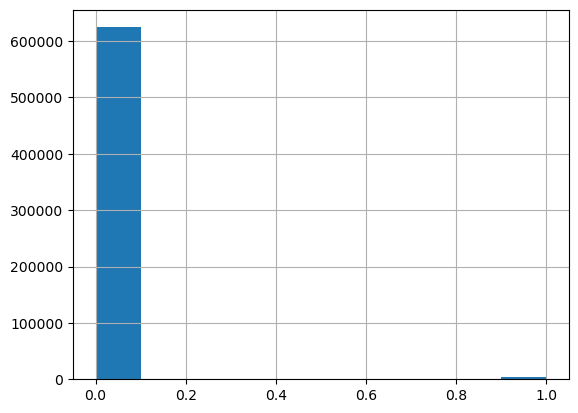

diabetes


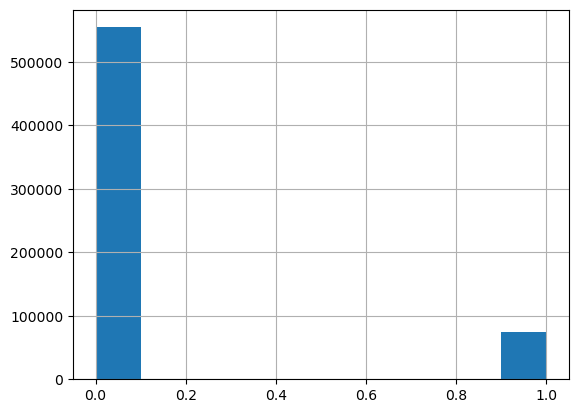

copd


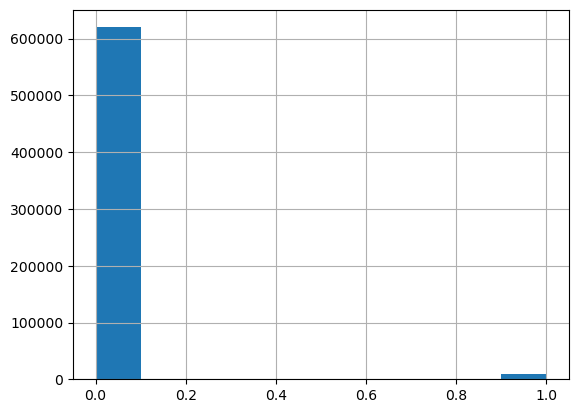

asthma


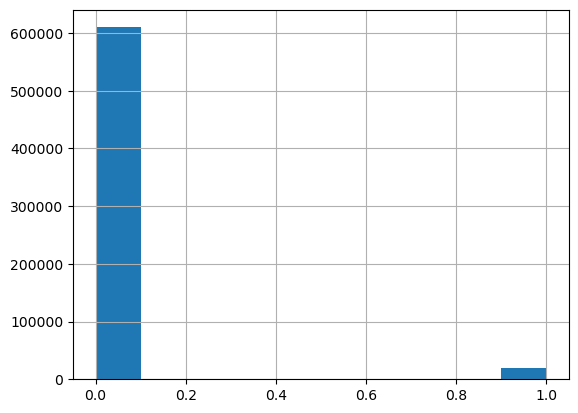

immunosup


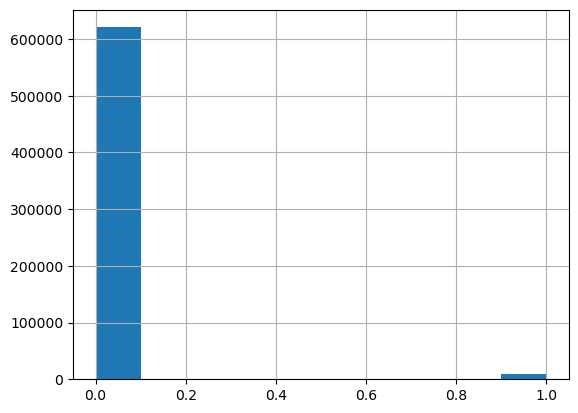

hypertension


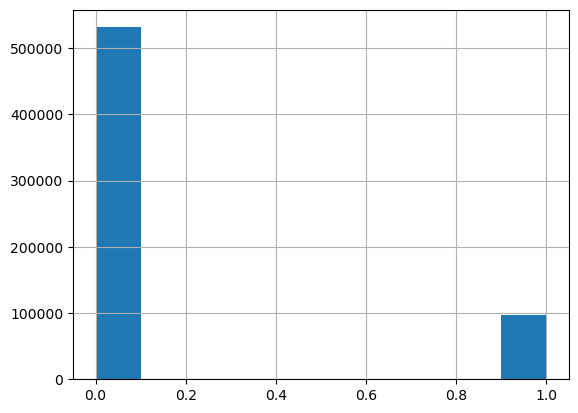

heart_problems


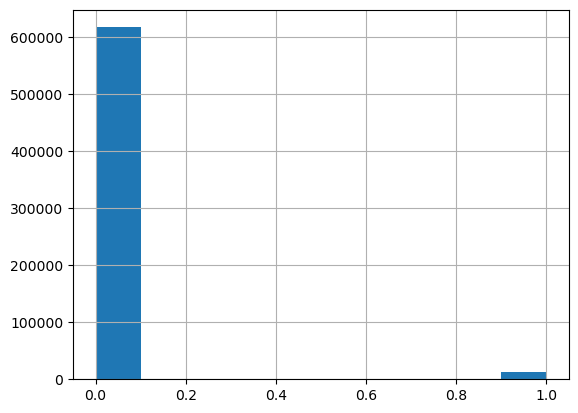

obese


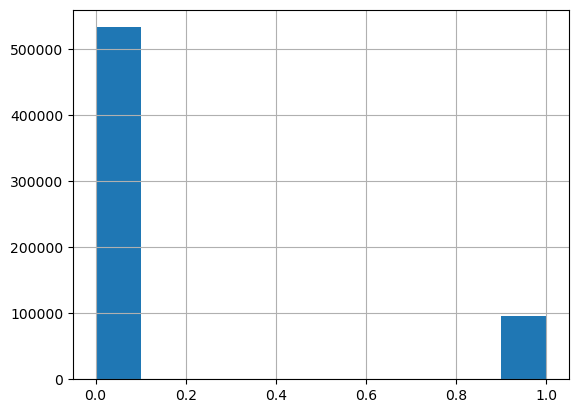

renal_disease


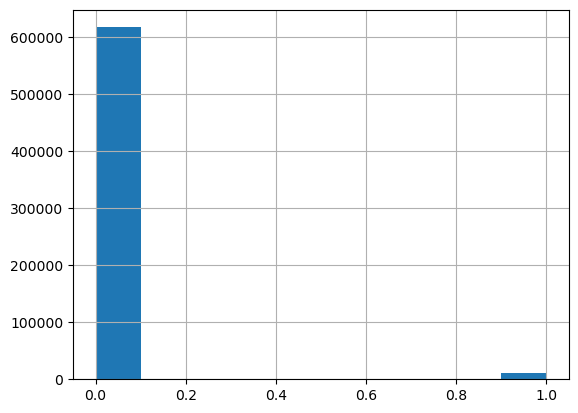

smoker


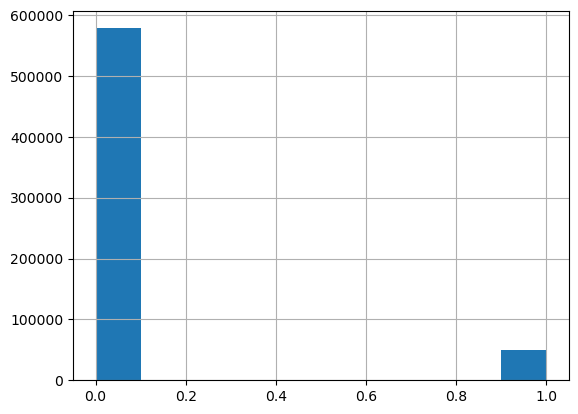

covid_pos


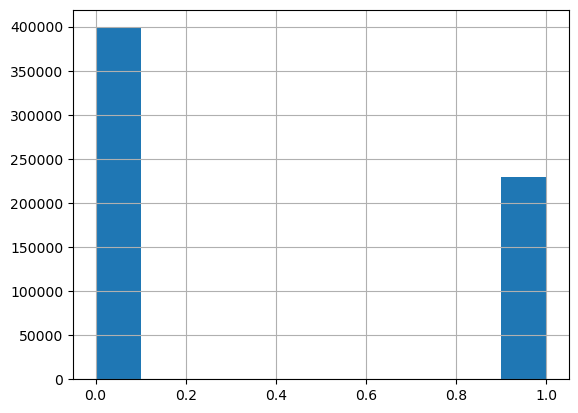

icu


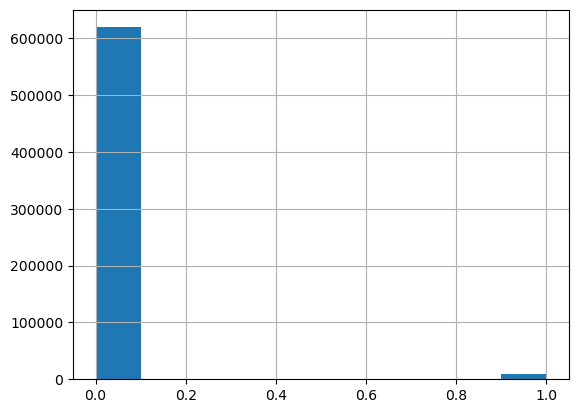

age_risk


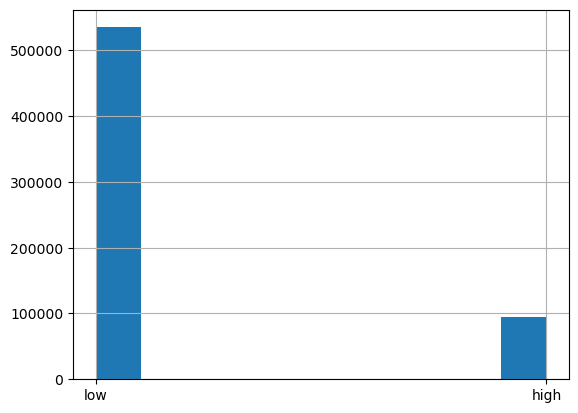

risk_sum


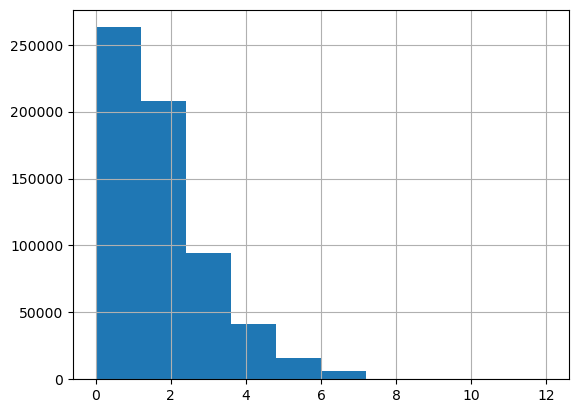

risk_category


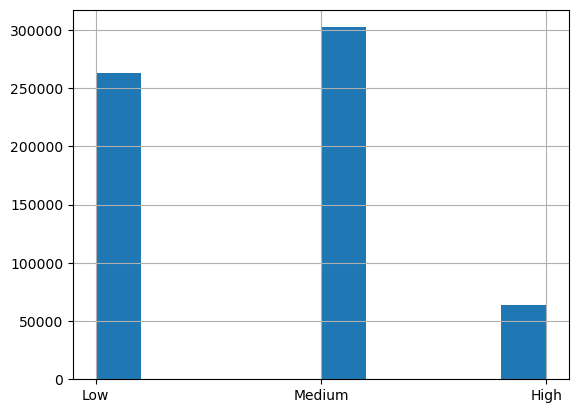

In [13]:
for col in train.columns:
    print(col)
    train[col].hist()
    plt.show()

In [14]:
train.columns

Index(['med_level', 'gender', 'is_hospitalized', 'is_dead', 'ventilator',
       'pneumonia', 'age', 'pregnant', 'diabetes', 'copd', 'asthma',
       'immunosup', 'hypertension', 'heart_problems', 'obese', 'renal_disease',
       'smoker', 'covid_pos', 'icu', 'age_risk', 'risk_sum', 'risk_category'],
      dtype='object')

In [87]:
target_var = 'risk_category'
feat_vars = ['med_level', 'gender', 'is_hospitalized', 'is_dead', 'ventilator',
       'pneumonia', 'age', 'pregnant', 'diabetes', 'copd', 'asthma',
       'immunosup', 'hypertension', 'heart_problems', 'obese', 'renal_disease',
       'smoker', 'icu', 'age_risk','risk_category']
def plot_correlations(df, target_var, feat_vars):
    # Calculate correlations between feature variables and target variable
    correlations = df[feat_vars].corrwith(df[target_var]).sort_values()
    target_var = 'taxvalue'
    feat_vars = ['bedrooms', 'bathrooms', 'area', 'yearbuilt', 'taxamount','county']
    # Create a bar chart to visualize correlations
    plt.figure(figsize=(10,6))
    plt.barh(correlations.index, correlations.values)
    plt.xlabel('Correlation with Target Variable')
    plt.title('Feature Variable Correlations with Target Variable')
    plt.show()

In [88]:
plot_correlations(train,target_var, feat_vars)

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [17]:
def create_barplot(data, x, y, title):
    # convert y column to numeric data type
    data[y] = pd.to_numeric(data[y])
    
    # create barplot
    sns.barplot(data=data, x=x, y=y)
    plt.title(title)
    
    # plot average line
    plt.axhline(data[y].mean(), color='red', linestyle='--', label='Average')
    plt.legend()

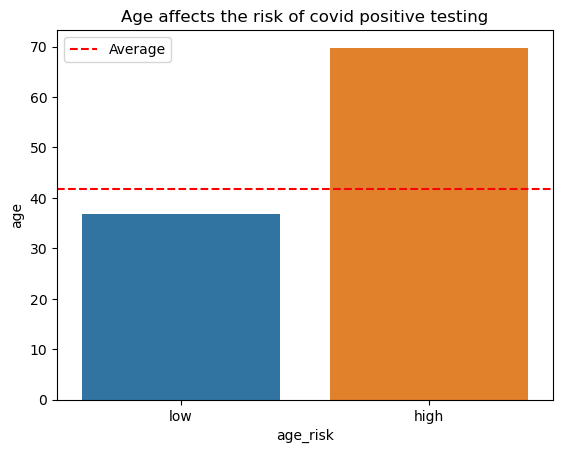

In [18]:
create_barplot(train,'age_risk','age','Age affects the risk of covid positive testing')

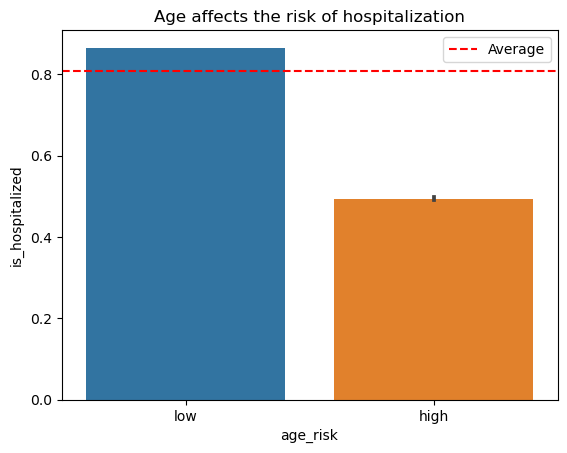

In [19]:
create_barplot(train,'age_risk','is_hospitalized','Age affects the risk of hospitalization')

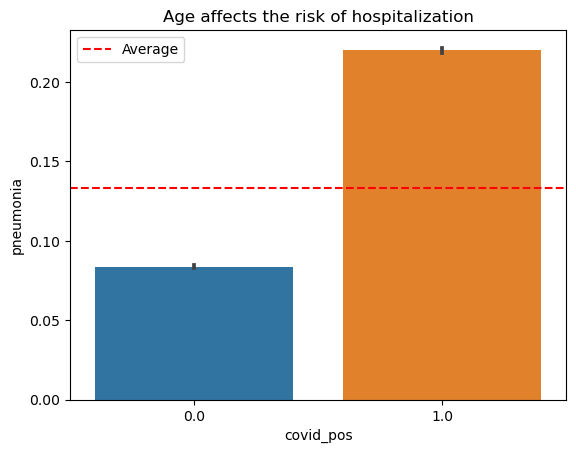

In [20]:
create_barplot(train,'covid_pos','pneumonia','Age affects the risk of hospitalization')

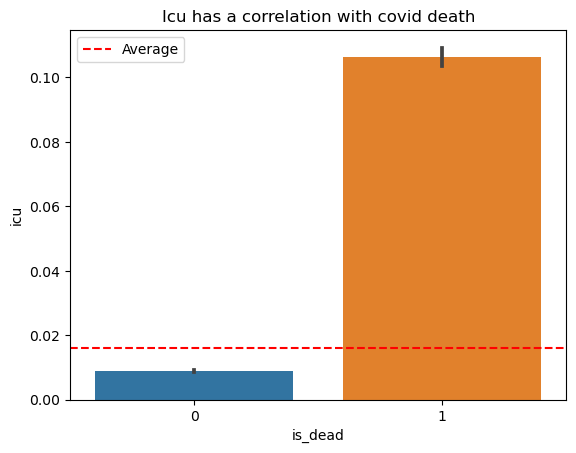

In [21]:
create_barplot(train,'is_dead','icu','Icu has a correlation with covid death')

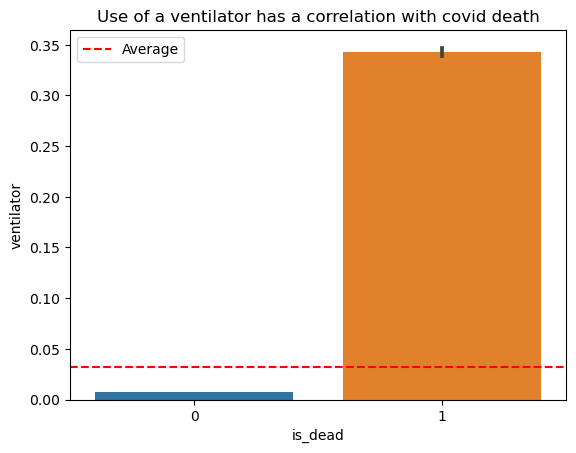

In [22]:
create_barplot(train,'is_dead','ventilator','Use of a ventilator has a correlation with covid death')

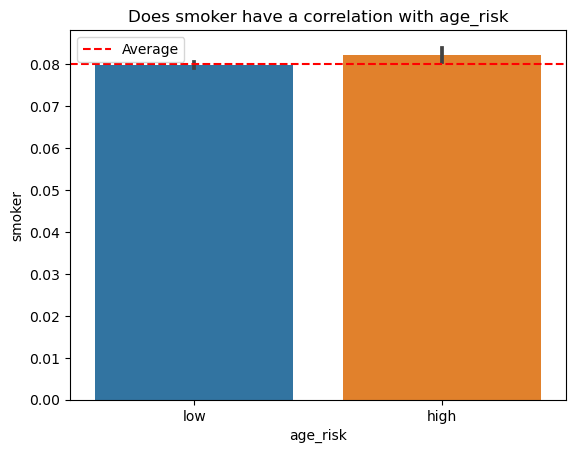

In [23]:
create_barplot(train,'age_risk','smoker','Does smoker have a correlation with age_risk')

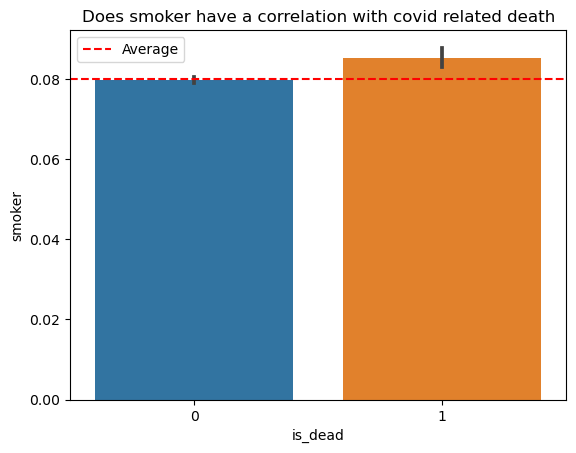

In [24]:
create_barplot(train,'is_dead','smoker','Does smoker have a correlation with covid related death')

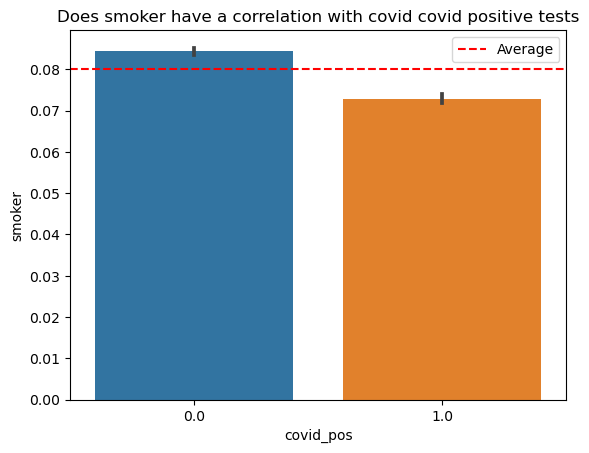

In [25]:
create_barplot(train,'covid_pos','smoker','Does smoker have a correlation with covid covid positive tests')

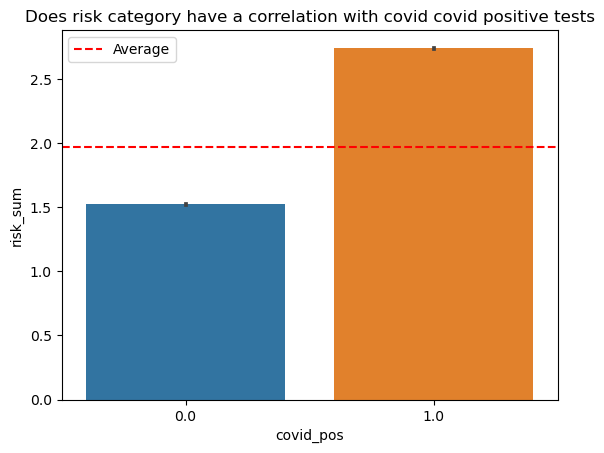

In [26]:
create_barplot(train,'covid_pos','risk_sum','Does risk category have a correlation with covid covid positive tests')

<AxesSubplot:xlabel='is_dead', ylabel='count'>

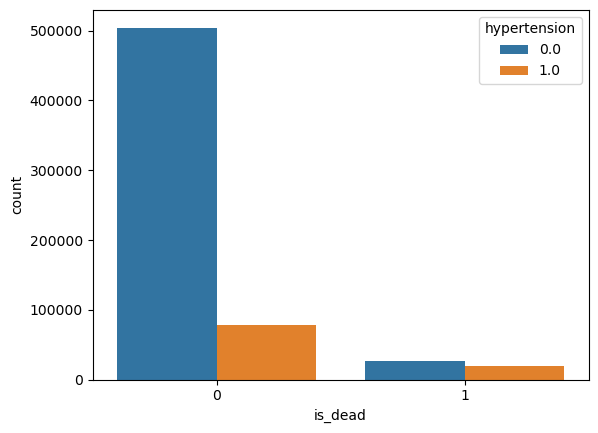

In [27]:
sns.countplot(x='is_dead', hue='hypertension', data=train)

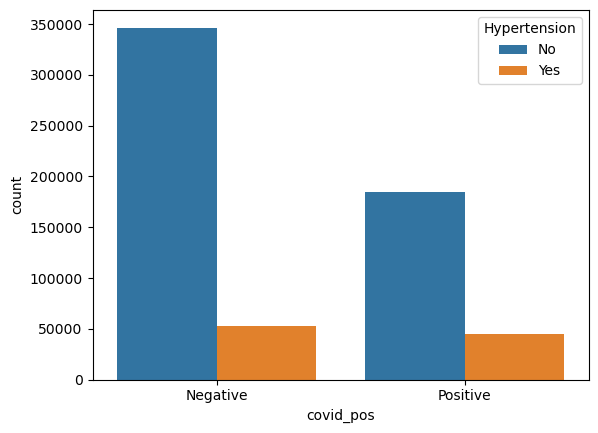

In [28]:
sns.countplot(x='covid_pos', hue='hypertension', data=train)

# Set the tick labels
plt.xticks(ticks=[0, 1], labels=['Negative', 'Positive'])

# Set the hue tick labels
plt.legend(title='Hypertension', labels=['No', 'Yes'])

# Display the plot
plt.show()

<AxesSubplot:xlabel='is_dead', ylabel='count'>

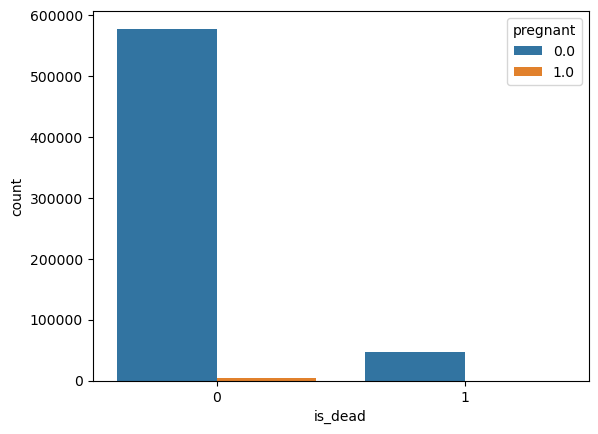

In [29]:
sns.countplot(x='is_dead', hue='pregnant', data=train)

<AxesSubplot:xlabel='covid_pos', ylabel='count'>

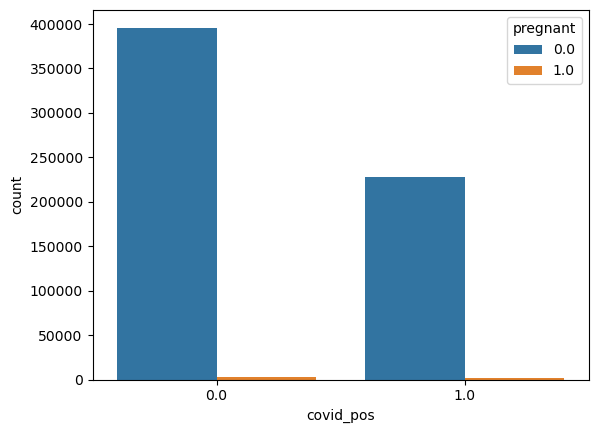

In [30]:
sns.countplot(x='covid_pos', hue='pregnant', data=train)

<AxesSubplot:xlabel='is_dead', ylabel='count'>

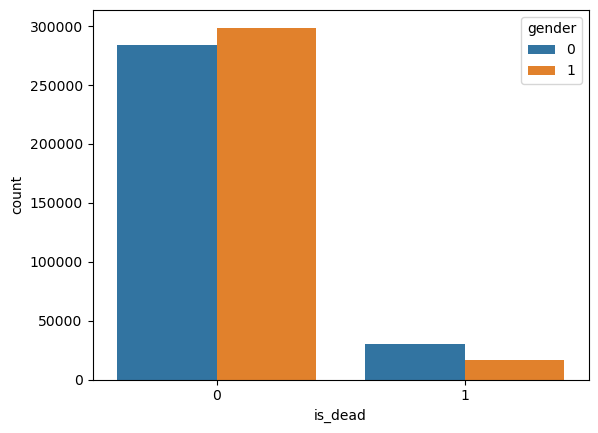

In [31]:
sns.countplot(x='is_dead', hue='gender', data=train)

<AxesSubplot:xlabel='covid_pos', ylabel='count'>

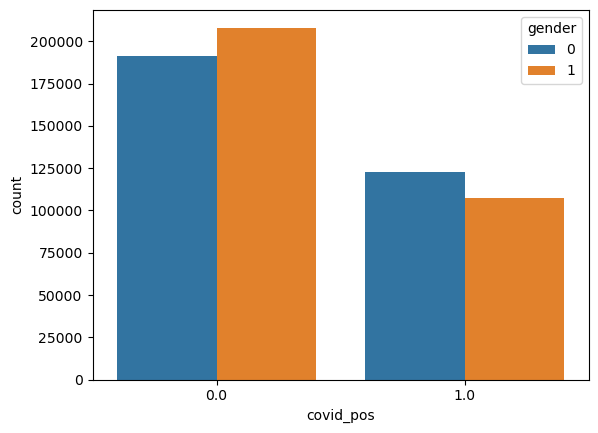

In [32]:
sns.countplot(x='covid_pos', hue='gender', data=train)

In [33]:
def categorical_variables(df, x_col, hue_col):
    # Plotting using Seaborn
    ax = sns.countplot(x=x_col, hue=hue_col, data=df)

    # Calculate average count
    avg_count = df.groupby([x_col, hue_col]).size().mean()

    # Add average count line
    ax.axhline(y=avg_count, color='r', linestyle='--', label='Average Count')

    # Set labels and title
    plt.xlabel(x_col)
    plt.ylabel('Count')
    plt.title('Counts of Variables by ' + x_col)

    # Add legend
    plt.legend()

    # Display the plot
    plt.show()


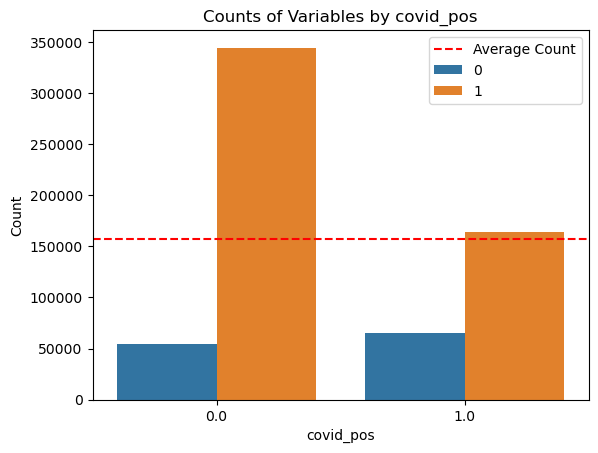

In [34]:
categorical_variables(train,'covid_pos','is_hospitalized')

In [35]:
def countplot(df, xvariable, hvariable, title=None):
    """
    Create a countplot with tick labels for x-variable and hue-variable.

    Parameters:
        df (DataFrame): The DataFrame containing the data.
        xvariable (str): The column name of the x-variable.
        hvariable (str): The column name of the hue-variable.
        title (str, optional): Title for the countplot.

    Returns:
        None
    """
    # Create the countplot
    sns.countplot(x=xvariable, hue=hvariable, data=df)

    # Set the tick labels
    plt.xticks(ticks=[0, 1], labels=['Negative', 'Positive'])

    # Set the hue tick labels
    plt.legend(title=hvariable, labels=['No', 'Yes'])

    # Calculate the average
    average = df[hvariable].mean()


    # Set the title
    if title:
        plt.title(title)

    # Display the plot
    plt.show()

In [35]:
def countplot(df, xvariable, hvariable, title=None):
    """
    Create a countplot with tick labels for x-variable and hue-variable.

    Parameters:
        df (DataFrame): The DataFrame containing the data.
        xvariable (str): The column name of the x-variable.
        hvariable (str): The column name of the hue-variable.
        title (str, optional): Title for the countplot.

    Returns:
        None
    """
    # Create the countplot
    sns.countplot(x=xvariable, hue=hvariable, data=df)

    # Set the tick labels
    plt.xticks(ticks=[0, 1], labels=['Negative', 'Positive'])

    # Set the hue tick labels
    plt.legend(title=hvariable, labels=['No', 'Yes'])

    # Calculate the average
    average = df[hvariable].mean()


    # Set the title
    if title:
        plt.title(title)

    # Display the plot
    plt.show()

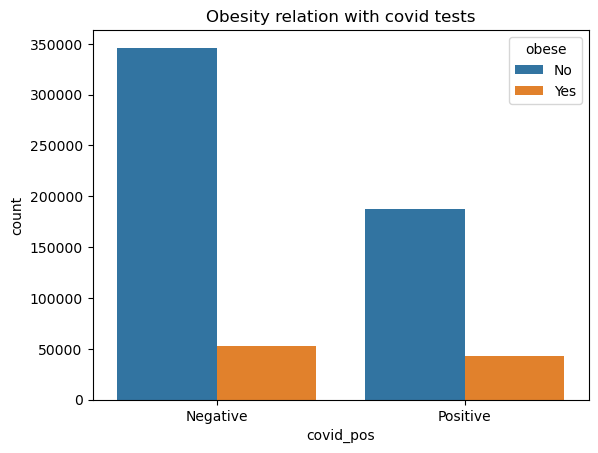

In [36]:
countplot(train,'covid_pos','obese',title='Obesity relation with covid tests')

In [37]:
def cat_cont_plot(df, xvariable, yvariable, title=None):
    """
    Create a plot for a categorical variable on the x-axis and a continuous variable on the y-axis.

    Parameters:
        df (DataFrame): The DataFrame containing the data.
        xvariable (str): The column name of the categorical variable.
        yvariable (str): The column name of the continuous variable.
        title (str, optional): Title for the plot.

    Returns:
        None
    """
    # Create the plot
    sns.boxplot(x=xvariable, y=yvariable, data=df)

    # Set x-axis tick labels
    x_labels = df[xvariable].unique()
    plt.xticks(range(len(x_labels)), x_labels)

    # Set labels
    plt.xlabel(xvariable)
    plt.ylabel(yvariable)

    # Set the title
    if title:
        plt.title(title)

    # Display the plot
    plt.show()

In [38]:
def chi_square_test(observed, alpha=0.05):
    "this function will calculate the chi square and print out results"
    chi2, p, dof, expected = stats.chi2_contingency(observed)
    print("Observed Contingency Table:")
    print(observed)
    print("Expected Contingency Table:")
    print(expected)
    print("Chi-Square Test Statistic:")
    print(chi2)
    print("p-value:")
    print(p)
    if p < alpha:
        print('We reject the null hypothesis.')
    else:
        print('We fail to reject the null hypothesis.')

In [39]:

import scipy.stats as stats

def con_stats_test(df, categorical_variable, continuous_variable, alpha=0.05):
    """
    Perform statistical tests between a categorical variable and a continuous variable.

    Parameters:
        df (DataFrame): The DataFrame containing the data.
        categorical_variable (str): The column name of the categorical variable.
        continuous_variable (str): The column name of the continuous variable.
        alpha (float, optional): The significance level for the test. Default is 0.05.

    Returns:
        test_statistic (float): The test statistic value.
        p_value (float): The p-value associated with the test.
    """
    # Separate the continuous variable by the categories in the categorical variable
    groups = []
    for category in df[categorical_variable].unique():
        group = df[df[categorical_variable] == category][continuous_variable]
        groups.append(group)

    # Perform the appropriate statistical test based on the number of groups
    if len(groups) == 2:  # Perform independent t-test
        test_statistic, p_value = stats.ttest_ind(groups[0], groups[1])
    else:  # Perform one-way ANOVA
        test_statistic, p_value = stats.f_oneway(*groups)

    # Print the result based on the p-value and alpha
    if p_value < alpha:
        print('We reject the null hypothesis.')
    else:
        print('We fail to reject the null hypothesis.')

    return test_statistic, p_value


# Hypotheses and stat test:

## 1. Does hypertension have a correlation with covid risk?

H_$0$ : Hypertension has no correlation with positive covid risk.
  
H_$A$: Hypertension has a correlation with positive covid risk.

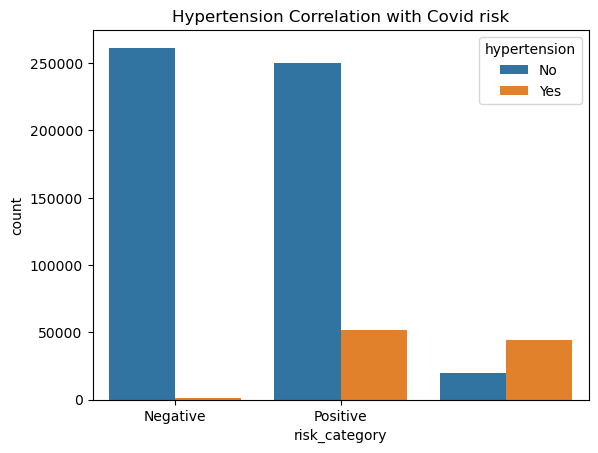

In [40]:
countplot(train,'risk_category','hypertension', 'Hypertension Correlation with Covid risk')

In [41]:
observed=pd.crosstab(train.risk_category,train.hypertension)
chi_square_test(observed)

Observed Contingency Table:
hypertension      0.0    1.0
risk_category               
High            19514  44375
Low            261585   1432
Medium         250279  51960
Expected Contingency Table:
[[ 53960.86600386   9928.13399614]
 [222145.04991059  40871.95008941]
 [255272.08408554  46966.91591446]]
Chi-Square Test Statistic:
187196.1736892609
p-value:
0.0
We reject the null hypothesis.


#### Insight:

## 2. Does age risk have a relation with covid positive cases?

H_$0$ : Age risk has no correlation with positive covid tests.
  
H_$A$: Age risk has a correlation with positive covid tests.

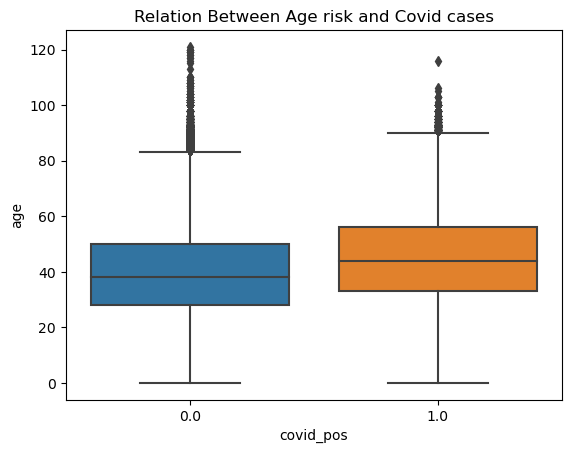

In [42]:
cat_cont_plot(train,'covid_pos','age',title='Relation Between Age risk and Covid cases')

In [43]:
observed=pd.crosstab(train.risk_category,train.age_risk)
chi_square_test(observed)

Observed Contingency Table:
age_risk        high     low
risk_category               
High           26454   37435
Low            20302  242715
Medium         47288  254951
Expected Contingency Table:
[[  9550.06733901  54338.93266099]
 [ 39315.5325847  223701.4674153 ]
 [ 45178.40007629 257060.59992371]]
Chi-Square Test Statistic:
46106.129906805094
p-value:
0.0
We reject the null hypothesis.


## 3. Does being a smoker have a correlation with covid positive tests?

H_$0$ : Smoking has no correlation with positive covid tests.
  
H_$A$: Smoking has a correlation with positive covid tests.

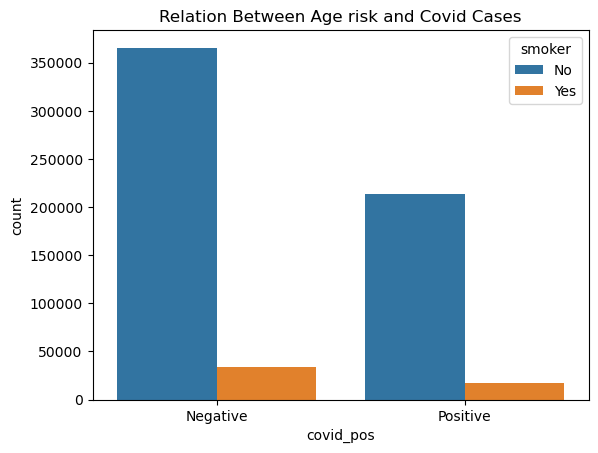

In [44]:
countplot(train,'covid_pos','smoker',title='Relation Between Age risk and Covid Cases')

In [45]:
observed=pd.crosstab(train.covid_pos,train.smoker)
chi_square_test(observed)

Observed Contingency Table:
smoker        0.0    1.0
covid_pos               
0.0        365565  33687
1.0        213139  16754
Expected Contingency Table:
[[367242.41535417  32009.58464583]
 [211461.58464583  18431.41535417]]
Chi-Square Test Statistic:
261.3734743037066
p-value:
8.612604769565337e-59
We reject the null hypothesis.


## 4.  Patient who died have a  direct correlation with covid positive tests?

H_$0$ : Death has no correlation with positive covid tests.
  
H_$A$: Death has a correlation with positive covid tests.

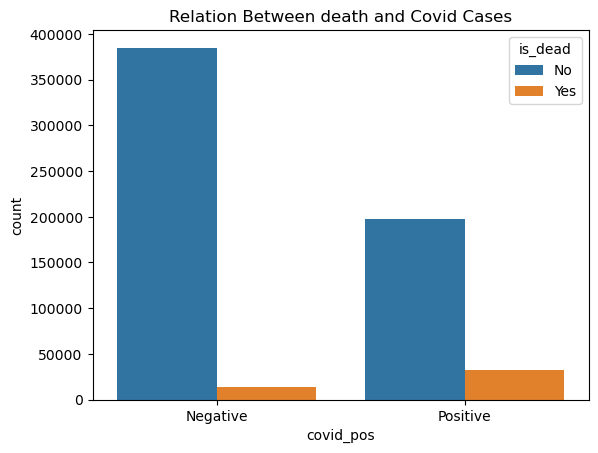

In [46]:
countplot(train,'covid_pos','is_dead',title='Relation Between death and Covid Cases')

In [47]:
observed=pd.crosstab(train.covid_pos,train.is_dead)
chi_square_test(observed)

Observed Contingency Table:
is_dead         0      1
covid_pos               
0.0        385048  14204
1.0        197809  32084
Expected Contingency Table:
[[369877.88659848  29374.11340152]
 [212979.11340152  16913.88659848]]
Chi-Square Test Statistic:
23141.8456871022
p-value:
0.0
We reject the null hypothesis.


## 4.  Patients with copd have a correlation with covid positive tests?

H_$0$ : COPD has no correlation with positive covid tests.
  
H_$A$: COPD has a correlation with positive covid tests.

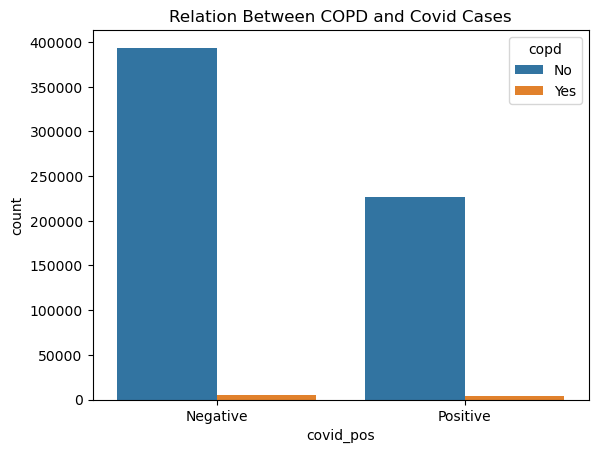

In [48]:
countplot(train,'covid_pos','copd',title='Relation Between COPD and Covid Cases')

In [49]:
observed=pd.crosstab(train.covid_pos,train.copd)
chi_square_test(observed)

Observed Contingency Table:
copd          0.0   1.0
covid_pos              
0.0        393786  5466
1.0        226281  3612
Expected Contingency Table:
[[393491.15050426   5760.84949574]
 [226575.84949574   3317.15050426]]
Chi-Square Test Statistic:
41.76160636995567
p-value:
1.0310836003564981e-10
We reject the null hypothesis.


## 5.  Patient with heart problems  have a correlation with covid positive tests?

H_$0$ : Heart problems has no correlation with positive covid tests.
  
H_$A$: Heart problems has a correlation with positive covid tests.

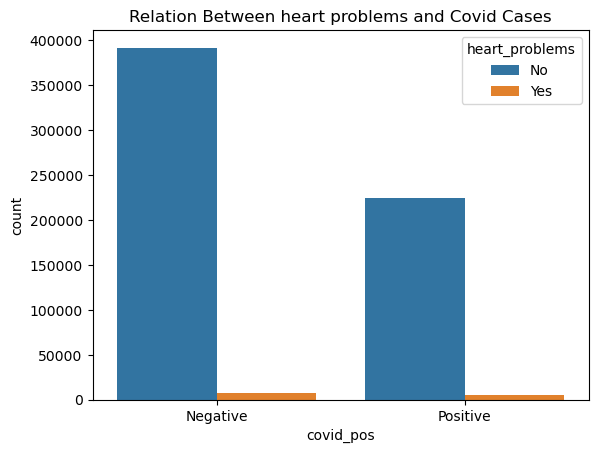

In [50]:
countplot(train,'covid_pos','heart_problems',title='Relation Between heart problems and Covid Cases')

In [51]:
observed=pd.crosstab(train.covid_pos,train.heart_problems)
chi_square_test(observed)

Observed Contingency Table:
heart_problems     0.0   1.0
covid_pos                   
0.0             391779  7473
1.0             224838  5055
Expected Contingency Table:
[[391301.79924183   7950.20075817]
 [225315.20075817   4577.79924183]]
Chi-Square Test Statistic:
79.81303891670282
p-value:
4.1156771790606704e-19
We reject the null hypothesis.


## 6.  Does hospitalizations have a correlation with covid positive tests?

H_$0$ : Hospitalization has no correlation with positive covid tests.
  
H_$A$: Hospitalization has a correlation with positive covid tests.

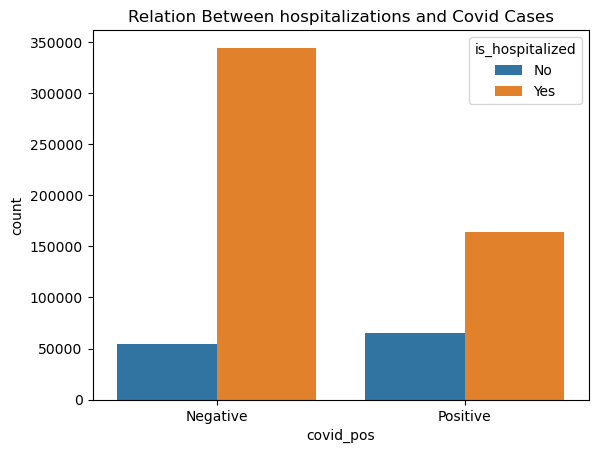

In [52]:
countplot(train,'covid_pos','is_hospitalized',title='Relation Between hospitalizations and Covid Cases')

In [53]:
observed=pd.crosstab(train.covid_pos,train.is_hospitalized)
chi_square_test(observed)

Observed Contingency Table:
is_hospitalized      0       1
covid_pos                     
0.0              54633  344619
1.0              65404  164489
Expected Contingency Table:
[[ 76174.8282574 323077.1717426]
 [ 43862.1717426 186030.8282574]]
Chi-Square Test Statistic:
20601.521869346478
p-value:
0.0
We reject the null hypothesis.


## 7.  Does ICU commitment  have a correlation with covid positive tests?

H_$0$ : ICU has no correlation with positive covid tests.
  
H_$A$: ICU has a correlation with positive covid tests.

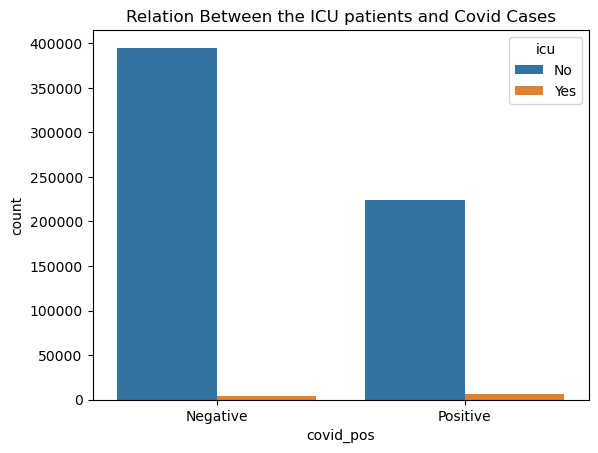

In [54]:
countplot(train,'covid_pos','icu',title='Relation Between the ICU patients and Covid Cases')

In [55]:
observed=pd.crosstab(train.covid_pos,train.is_hospitalized)
chi_square_test(observed)

Observed Contingency Table:
is_hospitalized      0       1
covid_pos                     
0.0              54633  344619
1.0              65404  164489
Expected Contingency Table:
[[ 76174.8282574 323077.1717426]
 [ 43862.1717426 186030.8282574]]
Chi-Square Test Statistic:
20601.521869346478
p-value:
0.0
We reject the null hypothesis.


In [89]:
train.age.mean()

41.7612187969387

# Modeling



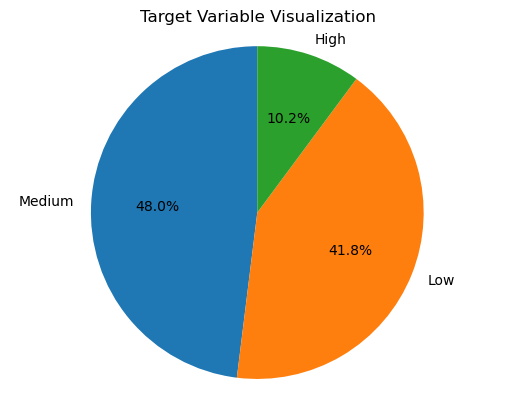

In [56]:
#Baseline: 48.0% Medium risk
create_pie_chart(train,'risk_category','Target Variable Visualization')

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [61]:
train.columns

Index(['med_level', 'gender', 'is_hospitalized', 'is_dead', 'ventilator',
       'pneumonia', 'age', 'pregnant', 'diabetes', 'copd', 'asthma',
       'immunosup', 'hypertension', 'heart_problems', 'obese', 'renal_disease',
       'smoker', 'covid_pos', 'icu', 'age_risk', 'risk_sum', 'risk_category'],
      dtype='object')

In [63]:
x_train=train[['med_level', 'gender', 'is_hospitalized', 'is_dead', 'ventilator',
       'pneumonia', 'age', 'pregnant', 'diabetes', 'copd', 'asthma',
       'immunosup', 'hypertension', 'heart_problems', 'obese', 'renal_disease',
       'smoker', 'covid_pos', 'icu']]
y_train=train.risk_category
x_validate=validate[['med_level', 'gender', 'is_hospitalized', 'is_dead', 'ventilator',
       'pneumonia', 'age', 'pregnant', 'diabetes', 'copd', 'asthma',
       'immunosup', 'hypertension', 'heart_problems', 'obese', 'renal_disease',
       'smoker', 'covid_pos', 'icu']]
y_validate=validate.risk_category
x_test=test[['med_level', 'gender', 'is_hospitalized', 'is_dead', 'ventilator',
       'pneumonia', 'age', 'pregnant', 'diabetes', 'copd', 'asthma',
       'immunosup', 'hypertension', 'heart_problems', 'obese', 'renal_disease',
       'smoker', 'covid_pos', 'icu']]
y_test=test.risk_category

In [67]:
def run_decision_tree(X_train, X_test, y_train, y_test, max_depth):
    """
    Trains a Decision Tree classifier on the provided training data and predicts the target variable
    for the test data.

    Parameters:
        X_train (array-like): Training features, shape (n_samples, n_features).
        X_test (array-like): Test features, shape (n_samples, n_features).
        y_train (array-like): Training target variable, shape (n_samples,).
        y_test (array-like): Test target variable, shape (n_samples,).
        max_depth (int): Maximum depth of the decision tree.

    Returns:
        float: Accuracy score of the decision tree classifier on the test data.
    """
    # Create a Decision Tree classifier
    dt = DecisionTreeClassifier(random_state=123,max_depth=max_depth)
    
    # Train the classifier on the training data
    dt.fit(X_train, y_train)
    
    # Predict the target variable for the test data
    y_pred = dt.predict(X_test)
    
    # Calculate and return the accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [75]:
def run_decision_tree2(X_train, X_test, y_train, y_test, max_depth):
    """
    Trains a Decision Tree classifier on the provided training data and predicts the target variable
    for the test data.

    Parameters:
        X_train (array-like): Training features, shape (n_samples, n_features).
        X_test (array-like): Test features, shape (n_samples, n_features).
        y_train (array-like): Training target variable, shape (n_samples,).
        y_test (array-like): Test target variable, shape (n_samples,).
        max_depth (int): Maximum depth of the decision tree.

    Returns:
        float: Accuracy score of the decision tree classifier on the training data.
        float: Accuracy score of the decision tree classifier on the test data.
    """
    # Create a Decision Tree classifier
    dt = DecisionTreeClassifier(random_state=123, max_depth=max_depth)
    
    # Train the classifier on the training data
    dt.fit(X_train, y_train)
    
    # Predict the target variable for the training and test data
    y_train_pred = dt.predict(X_train)
    y_test_pred = dt.predict(X_test)
    
    # Calculate and return the accuracy scores
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    return train_accuracy, test_accuracy

In [76]:
run_decision_tree2(x_train,x_validate,y_train,y_validate,3)

(0.8279283789905347, 0.8274753832582314)

In [77]:
run_decision_tree2(x_train,x_validate,y_train,y_validate,5)

(0.9099396800419617, 0.908800038147009)

In [78]:
run_decision_tree2(x_train,x_validate,y_train,y_validate,1)

(0.6849279577839766, 0.684924778866557)

In [79]:
run_decision_tree2(x_train,x_validate,y_train,y_validate,18)

(1.0, 0.9996471401664163)

In [80]:
run_decision_tree2(x_train,x_validate,y_train,y_validate,19)

(1.0, 0.9996471401664163)

In [84]:
def run_knn(X_train, X_test, y_train, y_test, n_neighbors):
    """
    Trains a K-Nearest Neighbors classifier on the provided training data and predicts the target variable
    for the test data.

    Parameters:
        X_train (array-like): Training features, shape (n_samples, n_features).
        X_test (array-like): Test features, shape (n_samples, n_features).
        y_train (array-like): Training target variable, shape (n_samples,).
        y_test (array-like): Test target variable, shape (n_samples,).
        n_neighbors (int): Number of neighbors to consider for classification.

    Returns:
        float: Accuracy score of the KNN classifier on the training data.
        float: Accuracy score of the KNN classifier on the test data.
    """
    # Create a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    
    # Train the classifier on the training data
    knn.fit(X_train, y_train)
    
    # Predict the target variable for the training and test data
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)
    
    # Calculate and return the accuracy scores
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    return train_accuracy, test_accuracy


In [ ]:
run_knn(x_train,x_validate,y_train,y_validate,10)